## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


#1.

In [13]:
from google.colab import files
import pandas as pd
# Upload file(s)
uploaded = files.upload() #downloaded 7 variables

gss_df = pd.read_excel("eda_lab_data.xlsx") #loaded the data using Pandas (for number 3)
gss_df.head()

gss_df.tail()

Saving eda_lab_data.xlsx to eda_lab_data (4).xlsx


,year,id_,hrs2,educ,happy,health,ballot
75694,2024,3305,.i: Inapplicable,8 or more years of college,Pretty happy,Fair,Ballot c
75695,2024,3306,.i: Inapplicable,2 years of college,Pretty happy,Fair,Ballot a
75696,2024,3307,.i: Inapplicable,12th grade,Pretty happy,Good,Ballot a
75697,2024,3308,.i: Inapplicable,8 or more years of college,Pretty happy,Excellent,Ballot b
75698,2024,3309,.i: Inapplicable,6 years of college,Pretty happy,Good,Ballot b


#2.

The dataset we selected provides allows us to explore how individual experiences of work, education, health, and happiness are connected across time. It includes seven variables: id, ballot, year, hrs2, educ, happy, and health. Each variable contributes to understanding broader social and personal trends, while also offering clear avenues for statistical and interpretive analysis.

The id and ballot variables correspond to the respondant's assigned id and the ballot they used to provide their responses.

The year variable correlates to when a respondent’s data was collected. This is important because it introduces the factor of time. This allows us to examine how people’s experiences may shift over time. For example, changes in the economy, healthcare systems, or cultural values across years might influence how much people work, how they evaluate their health, or how they perceive happiness. By including year, we are able to look not only at individual-level variation but also at larger social changes that affect people’s lives.

The hrs2 variable represents the number of hours a respondent worked per week.
This allows us to examine how an individual's working hours affects their personal well-being. Longer hours can lead to stress and health problems, but also provide financial security, which contributes to happiness.

The educ variable reflects the highest year of school a respondent completed. Education often plays a foundational role in shaping a person's employment opportunities, income, hours worked, and subsequently, their health and happiness.

The happy variable captures a respondent’s self-reported happiness. Happiness is a subjective measure of well-being, and though it can be influenced by many factors, some big factors influencing happiness include the ones being examined in this dataset. Studying happiness allows us to see an individual's quality of life. In this dataset, we hope to see how happiness interacts with the other variables in this dataset, and how those variables influence the amount of happiness an indivdual perceives they have.

The health variable reflects respondents’ self-reported physical health. Health is a crucial component of overall well-being and may also mediate the relationship between work and happiness. For instance, individuals working extremely long hours might report worse health, which in turn could lower happiness. Conversely, those with good health might feel more capable of handling demanding work schedules.

By using this dataset, our primary goal is to explore the relationships between these variables. Specifically, we want to examine how the number of hours worked per week correlates with self-reported health and happiness. We are also interested in how responses vary across different years, as well as how education influences both work hours and well-being. Ultimately, this dataset allows us to connect individual-level experiences with broader social trends, providing a richer understanding of how work, education, health, and happiness intersect over time.

#3.

In [60]:
gss_df_clean = gss_df.replace({r'^\..*': None}, regex=True) #Replace codes like ".i: Inapplicable" with NaN

gss_df_clean = gss_df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x) #Strip whitespace from string variables
gss_df_clean.columns = gss_df_clean.columns.str.lower().str.strip().str.replace(" ", "_") #Optional: standardize column names (lowercase, no spaces)

for col in ["happy", "health"]: #Convert only "happy" and "health" to numeric
    gss_df_clean[col] = gss_df_clean[col].astype("category").cat.codes

gss_df_clean["hrs2"] = pd.to_numeric(gss_df_clean["hrs2"], errors="coerce") #Convert 'hrs2' to numeric, coercing errors


#"happy"
#-1 = missing/refused/don’t know (GSS codes after cleaning)
#0 = “Not too happy”
#1 = “Pretty happy”
#2 = “Very happy”

#"health"
#-1 → all rows where health was missing/inapplicable (GSS codes after cleaning)
#0 → originally "Excellent"
#1 → originally "Fair"
#2 → originally "Good"
#3 → originally "Poor"

gss_df_clean.head() #Generate first few rows
gss_df_clean.tail() #Generate last few rows

/tmp/ipython-input-3700141886.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gss_df_clean = gss_df_clean.applymap(lambda x: x.strip() if isinstance(x, str) else x) #Strip whitespace from string variables


,year,id_,hrs2,educ,happy,health,ballot
75694,2024,3305,NaN,8 or more years of college,1,1,Ballot c
75695,2024,3306,NaN,2 years of college,1,1,Ballot a
75696,2024,3307,NaN,12th grade,1,2,Ballot a
75697,2024,3308,NaN,8 or more years of college,1,0,Ballot b
75698,2024,3309,NaN,6 years of college,1,2,Ballot b


#4.

In [54]:
gss_df_clean.dtypes #Generate types of variables

,0
year,int64
id_,int64
hrs2,float64
educ,object
happy,int8
health,int8
ballot,object


In [33]:
gss_df_clean.describe() #Generate summary statistics for numeric variables

,year,id_,happy,health
count,75699.000000,75699.000000,75699.000000,75699.000000
mean,1998.864503,1259.858598,1.017358,0.775677
std,15.722971,918.088290,0.816463,1.268004
min,1972.000000,1.000000,-1.000000,-1.000000
25%,1986.000000,543.000000,1.000000,0.000000
50%,1998.000000,1100.000000,1.000000,1.000000
75%,2012.000000,1766.000000,2.000000,2.000000
max,2024.000000,4510.000000,2.000000,3.000000


In [30]:
gss_df_clean.loc[:,['happy','health']].groupby('happy').describe() #Summary for "happy" vs "health", grouped by "happy"

health                                             
         count      mean       std  min  25%  50%  75%  max
happy                                                      
-1      4830.0  0.501449  1.326997 -1.0 -1.0  0.0  2.0  3.0
 0     10095.0  1.075087  1.274923 -1.0  0.0  1.0  2.0  3.0
 1     39705.0  0.830273  1.263943 -1.0  0.0  1.0  2.0  3.0
 2     21069.0  0.592197  1.218375 -1.0  0.0  0.0  2.0  3.0

In [31]:
gss_df_clean.loc[:,['happy','year']].groupby('happy').describe() #Summary for "happy" vs "year", grouped by "happy"

year                                                                
         count         mean        std     min     25%     50%     75%     max
happy                                                                         
-1      4830.0  2003.371843   5.236312  1972.0  2002.0  2004.0  2006.0  2024.0
 0     10095.0  2001.507083  17.038352  1972.0  1986.0  2002.0  2018.0  2024.0
 1     39705.0  1998.794157  16.017043  1972.0  1985.0  1998.0  2014.0  2024.0
 2     21069.0  1996.697613  15.706053  1972.0  1984.0  1996.0  2010.0  2024.0

In [32]:
gss_df_clean.loc[:,['health','year']].groupby('health').describe() #Summary for "health" vs "year", grouped by "health"

year                                                          \
          count         mean        std     min     25%     50%     75%   
health                                                                    
-1      17251.0  1997.782447  12.449305  1972.0  1986.0  1996.0  2008.0   
 0      16293.0  1996.650095  15.842418  1972.0  1984.0  1996.0  2008.0   
 1      11545.0  2000.017757  17.108661  1972.0  1985.0  2000.0  2016.0   
 2      27406.0  2000.510582  16.525167  1972.0  1987.0  2000.0  2016.0   
 3       3204.0  1997.715668  16.708740  1972.0  1982.0  1998.0  2014.0   

                
           max  
health          
-1      2024.0  
 0      2024.0  
 1      2024.0  
 2      2024.0  
 3      2024.0

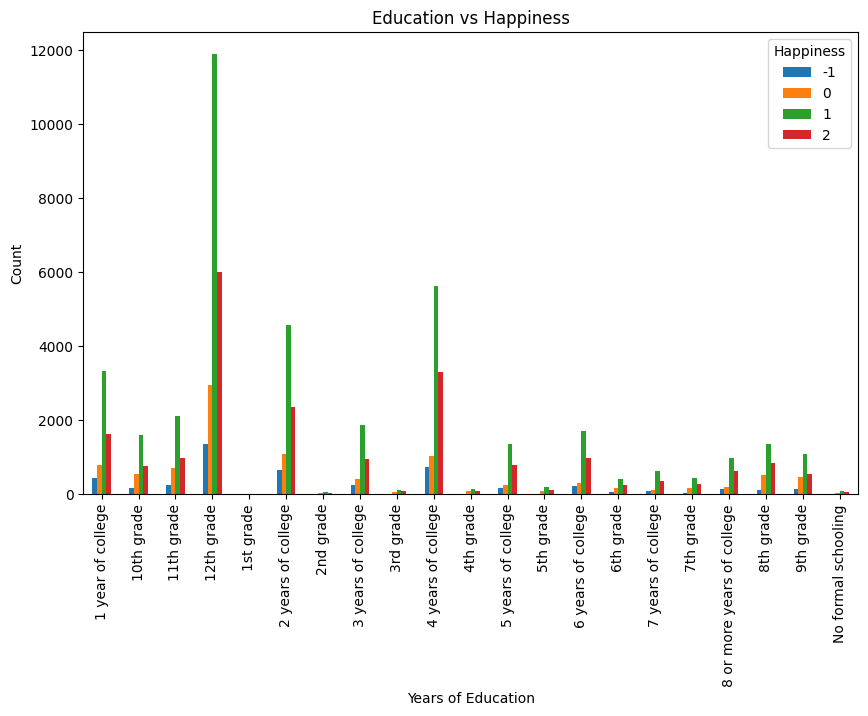

In [35]:
import matplotlib.pyplot as plt
ct = pd.crosstab(gss_df_clean["educ"], gss_df_clean["happy"]) #Cross-tabulate education and happiness

ct.plot(kind="bar", figsize=(10,6)) #Plot

plt.title("Education vs Happiness")
plt.xlabel("Years of Education")
plt.ylabel("Count")
plt.legend(title = "Happiness")
plt.show()

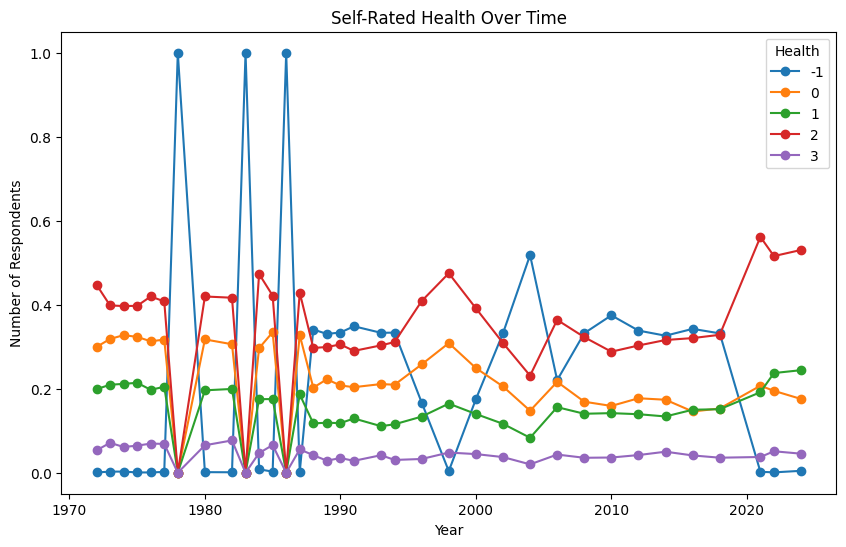

In [42]:
ct = pd.crosstab(gss_df_clean["year"], gss_df_clean["health"], normalize = "index")

# Line plot
ct.plot(kind = "line", marker = "o", figsize = (10,6)) #Line plot between "year" vs "health"

plt.title("Self-Rated Health Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Respondents")
plt.legend(title = "Health")
plt.show()

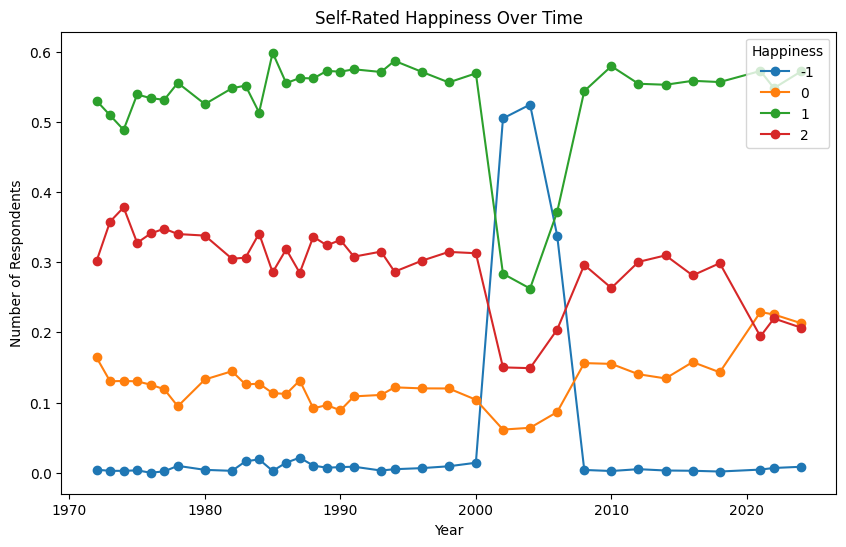

In [43]:
ct = pd.crosstab(gss_df_clean["year"], gss_df_clean["happy"], normalize = "index")

# Line plot
ct.plot(kind = "line", marker = "o", figsize = (10,6))

plt.title("Self-Rated Happiness Over Time") #Lineplot of "year" vs "happy"
plt.xlabel("Year")
plt.ylabel("Number of Respondents")
plt.legend(title = "Happiness")
plt.show()

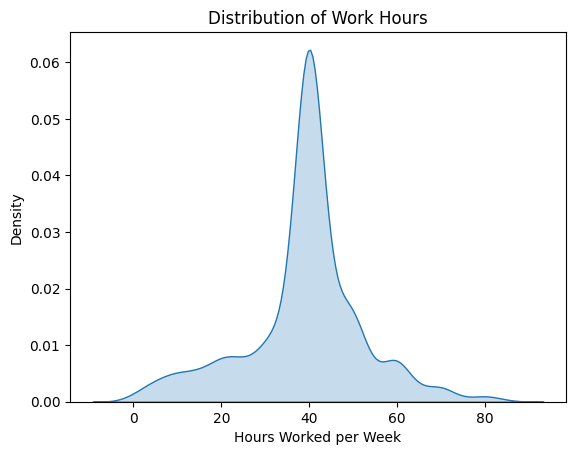

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(gss_df_clean["hrs2"].dropna(), fill = True) #KDE plot describing what kind of hours people work
plt.xlabel("Hours Worked per Week")
plt.title("Distribution of Work Hours")
plt.show()

/tmp/ipython-input-96250862.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "happy", y = "hrs2", data = gss_df_clean, palette = "pastel")


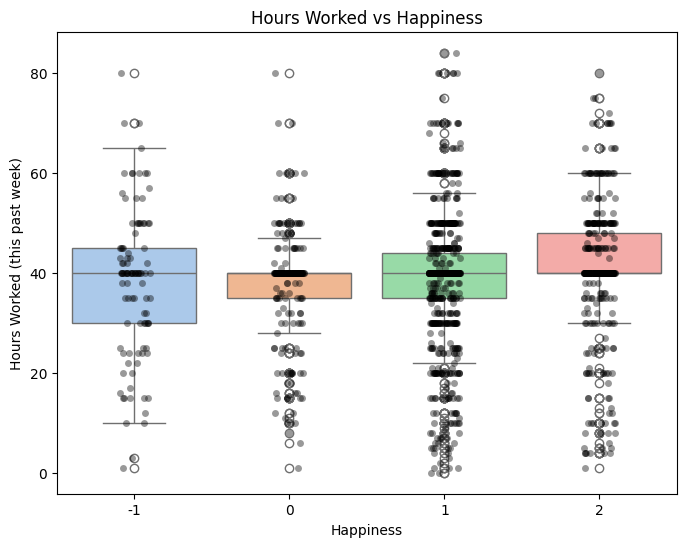

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6)) #boxplot for hours worked vs happiness
sns.boxplot(x = "happy", y = "hrs2", data = gss_df_clean, palette = "pastel")
sns.stripplot(x = "happy", y = "hrs2", data = gss_df_clean, color = "black", alpha = 0.4, jitter = True)

plt.title("Hours Worked vs Happiness")
plt.xlabel("Happiness")
plt.ylabel("Hours Worked (this past week)")
plt.show()

/tmp/ipython-input-368003508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "health", y = "hrs2", data = gss_df_clean, palette = "pastel")


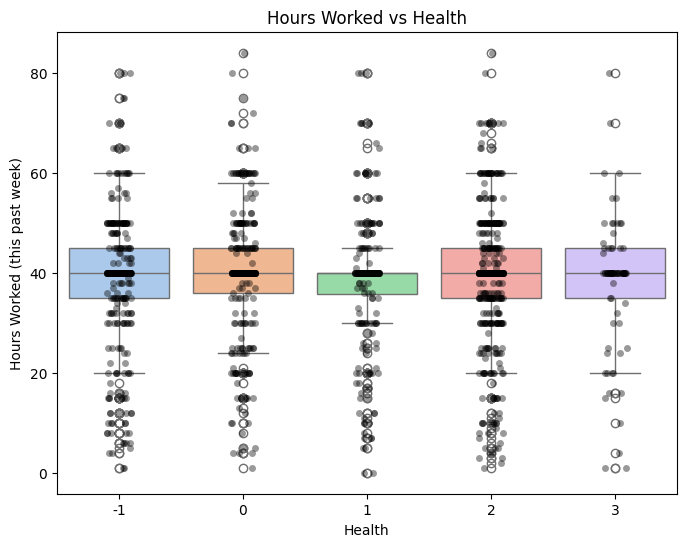

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6)) #boxplot for hours worked vs health
sns.boxplot(x = "health", y = "hrs2", data = gss_df_clean, palette = "pastel")
sns.stripplot(x = "health", y = "hrs2", data = gss_df_clean, color = "black", alpha = 0.4, jitter = True)

plt.title("Hours Worked vs Health")
plt.xlabel("Health")
plt.ylabel("Hours Worked (this past week)")
plt.show()

#5.
